In [1]:
%load_ext autoreload

In [3]:
%matplotlib inline

import pandas as pd
from matplotlib import pyplot as plt
from uncertainties import unumpy as unp
import numpy as np
import uncertainties as unc

from sys import path
path.append('../')
path.append('../pylib/')
path.append('../../../seaquest-distribution/seaquest_scripts/pylib/')
from emc import *

%autoreload 2
%aimport emc

### Objectives
1. Get yields from MM sample
2. Get yields from PP sample
3. Put together
4. Show *any* intensity dependence

Note: set preferences in *emc.cfg* first!

In [4]:
server = 'e906-db3.fnal.gov'
analysis_schema = 'user_dannowitz_analysis_Mar2016'
analysis_table = 'kDimuon_likesign'
merged_schema_list = ['merged_roadset62_R005_V001']
# If fresh start == True, re-apply all cuts (takes ~10min)
fresh_start = False
#fresh_start = True

In [5]:
# Get valid target dimuons
mm_df = get_dimuon_df(server=server, 
                      analysis_schema=analysis_schema, 
                      source_schema_list=merged_schema_list,
                      analysis_table="kDimuonMM",
                      fresh_start=True,
                      likesign='MM')
pp_df = get_dimuon_df(server=server, 
                      analysis_schema=analysis_schema, 
                      source_schema_list=merged_schema_list,
                      analysis_table="kDimuonPP",
                      fresh_start=True,
                      likesign='PP')

>>> Retrieving and Cleaning Dimuon Data for merged_roadset62_R005_V001
50312 dimuons from source table.
31223 entries copied over with mass between 4.200000 and 10.000000 GeV and chisq<15.000000
30395 dimuons: after 828 entries deleted for x-range cuts
25528 dimuons: after 4867 entries deleted for bad spill cuts
10726 dimuons: after 14802 entries deleted for dump-radius cut
2011 dimuons: after 8715 entries deleted for event level cuts
335 dimuons: after 1676 entries deleted for kEvent status cut
Adding QIE information to Dimuon table.
Adding Intensity_p information to Dimuon table.
335 dimuons after all cuts
>>> Retrieving and Cleaning Dimuon Data for merged_roadset62_R005_V001
24772 dimuons from source table.
10316 entries copied over with mass between 4.200000 and 10.000000 GeV and chisq<15.000000
9613 dimuons: after 703 entries deleted for x-range cuts
7916 dimuons: after 1697 entries deleted for bad spill cuts
3255 dimuons: after 4661 entries deleted for dump-radius cut
591 dimuons

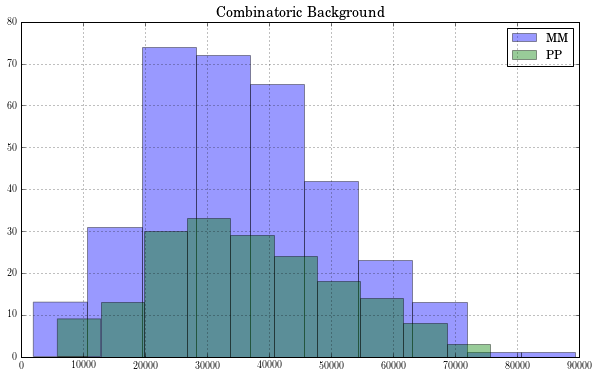

In [6]:
mm_df.Intensity_p.hist(alpha=0.4, label='MM', figsize=(10,6))
pp_df.Intensity_p.hist(alpha=0.4, label='PP')
plt.title('Combinatoric Background', fontsize=14)
plt.legend()

In [14]:
dimuon_df[['dimuonID', 'target', 'Intensity_p']].head()

NameError: name 'dimuon_df' is not defined

In [12]:
dimuon_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82290 entries, 0 to 82289
Data columns (total 39 columns):
dimuonID           82290 non-null int64
runID              82290 non-null int64
spillID            82290 non-null int64
eventID            82290 non-null int64
targetPos          82290 non-null int64
posTrackID         82290 non-null int64
negTrackID         82290 non-null int64
dx                 82290 non-null float64
dy                 82290 non-null float64
dz                 82290 non-null float64
dpx                82290 non-null float64
dpy                82290 non-null float64
dpz                82290 non-null float64
mass               82290 non-null float64
xF                 82290 non-null float64
xB                 82290 non-null float64
xT                 82290 non-null float64
costh              82290 non-null float64
phi                82290 non-null float64
trackSeparation    82290 non-null float64
chisq_dimuon       82290 non-null float64
px1                8229

In [7]:
# Get spill data from specified spills
spill_df = get_spill_df(server=server,
                        analysis_schema=analysis_schema,
                        merged_schema_list=merged_schema_list)

In [10]:
# Write dimuons and spill data to file
dimuon_df.to_csv('dimuon_57_59_62_67.tsv', sep='\t')
spill_df.to_csv('spill_57_59_62_67.tsv', sep='\t')

In [9]:
# Read dimuons and spill data from file
dimuon_df = pd.read_csv('dimuon_57_59_62_67.tsv',
                        sep='\t',
                        index_col='Unnamed: 0')
spill_df = pd.read_csv('spill_57_59_62_67.tsv',
                        sep='\t',
                        index_col='Unnamed: 0')

In [13]:
# Establish run ranges and x_2 bin edges 
run_ranges = [(8912, 10420), (11075, 12438), (12525, 15789)]
bin_edges = [0.08, 0.14, 0.16, 0.18, 0.21, 0.25, 0.31, 0.53]

In [14]:
emc_df, means_list, avg_means_df = emc_analysis(dimuon_df, spill_df, run_ranges,
                                                bin_edges, qie_correction=False)
#emc_df_q, means_list_q, avg_means_df_q = emc_analysis(dimuon_df, spill_df, run_ranges,
#                                                      bin_edges, qie_correction=True)

In [12]:
reload(emc)

<module 'emc' from '../emc.pyc'>

In [8]:
dimuon_df.columns

Index([u'dimuonID', u'runID', u'spillID', u'eventID', u'targetPos',
       u'posTrackID', u'negTrackID', u'dx', u'dy', u'dz', u'dpx', u'dpy',
       u'dpz', u'mass', u'xF', u'xB', u'xT', u'costh', u'phi',
       u'trackSeparation', u'chisq_dimuon', u'px1', u'py1', u'pz1', u'px2',
       u'py2', u'pz2', u'isValid', u'isTarget', u'isDump', u'QIESum',
       u'Intensity_p', u'weight', u'dpt', u'pt1', u'pt2', u'target',
       u'roadset', u'weight_sq'],
      dtype='object')

In [11]:
emc_df

,xT,D/H,C/D,Fe/D,W/D,C/H,Fe/H,W/H,Fe/C,W/C,W/D(iso),W/C(iso),Fe/D(iso),Fe/C(iso)
"(0.08, 0.14]",0.126+/-0.010,1.22+/-0.04,0.97+/-0.04,0.974+/-0.033,0.897+/-0.029,1.17+/-0.05,1.19+/-0.05,1.10+/-0.04,0.97+/-0.04,0.89+/-0.04,0.865+/-0.029,0.855+/-0.035,0.961+/-0.033,0.95+/-0.04
"(0.14, 0.16]",0.150+/-0.006,1.151+/-0.035,1.05+/-0.04,1.044+/-0.035,0.988+/-0.031,1.22+/-0.05,1.20+/-0.05,1.14+/-0.04,0.98+/-0.04,0.94+/-0.04,0.963+/-0.031,0.915+/-0.035,1.034+/-0.034,0.98+/-0.04
"(0.16, 0.18]",0.170+/-0.006,1.19+/-0.04,1.03+/-0.04,1.018+/-0.033,1.033+/-0.031,1.23+/-0.05,1.21+/-0.05,1.24+/-0.05,0.98+/-0.04,0.99+/-0.04,1.000+/-0.030,0.961+/-0.035,1.007+/-0.033,0.97+/-0.04
"(0.18, 0.21]",0.194+/-0.009,1.195+/-0.033,1.067+/-0.034,1.077+/-0.031,1.008+/-0.028,1.27+/-0.05,1.28+/-0.04,1.21+/-0.04,1.013+/-0.035,0.941+/-0.031,0.976+/-0.027,0.911+/-0.031,1.064+/-0.031,1.002+/-0.034
"(0.21, 0.25]",0.227+/-0.011,1.17+/-0.04,1.09+/-0.04,1.09+/-0.04,1.072+/-0.033,1.28+/-0.05,1.27+/-0.05,1.26+/-0.05,0.99+/-0.04,0.98+/-0.04,1.041+/-0.033,0.95+/-0.04,1.07+/-0.04,0.98+/-0.04
"(0.25, 0.31]",0.275+/-0.017,1.10+/-0.04,1.07+/-0.04,1.02+/-0.04,0.96+/-0.04,1.22+/-0.06,1.12+/-0.05,1.06+/-0.05,0.94+/-0.04,0.89+/-0.04,0.945+/-0.035,0.87+/-0.04,1.01+/-0.04,0.94+/-0.04
"(0.31, 0.53]",0.36+/-0.05,1.17+/-0.06,1.04+/-0.06,1.03+/-0.06,1.08+/-0.05,1.22+/-0.09,1.20+/-0.08,1.27+/-0.08,0.96+/-0.06,1.03+/-0.06,1.05+/-0.05,1.00+/-0.06,1.02+/-0.06,0.95+/-0.06


In [10]:
means_list[0]

mass                dz      dpz        dpt  \
target xT                                                                
C      (0.08, 0.14]  4.42+/-0.18  (-1.5+/-0.5)e+02  88+/-10  0.8+/-0.5   
       (0.14, 0.16]  4.54+/-0.25  (-1.5+/-0.5)e+02   77+/-9  0.8+/-0.5   
       (0.16, 0.18]  4.72+/-0.31  (-1.5+/-0.4)e+02  73+/-10  0.8+/-0.5   
       (0.18, 0.21]    4.9+/-0.4  (-1.4+/-0.4)e+02  70+/-10  0.8+/-0.5   
       (0.21, 0.25]    5.3+/-0.4  (-1.5+/-0.4)e+02  69+/-11  1.0+/-0.6   
       (0.25, 0.31]    5.8+/-0.5  (-1.4+/-0.4)e+02  68+/-10  1.0+/-0.6   
       (0.31, 0.53]    6.6+/-0.7  (-1.5+/-0.4)e+02  68+/-11  1.0+/-0.7   
Empty  (0.08, 0.14]  4.36+/-0.12  (-1.8+/-0.8)e+02   85+/-8  1.0+/-0.7   
       (0.14, 0.16]  4.50+/-0.19  (-2.0+/-0.5)e+02   76+/-9  0.9+/-0.5   
       (0.16, 0.18]  4.79+/-0.31  (-2.1+/-0.5)e+02   78+/-8  1.1+/-0.8   
       (0.18, 0.21]  4.93+/-0.35  (-1.9+/-0.4)e+02  72+/-10  1.1+/-0.6   
       (0.21, 0.25]    5.4+/-0.4  (-1.7+/-0.5)e+02  68+/-14  0.8+/-0.6   
       (0.25, 0.31]  5.51+/-0.27  (-1.6+/-0.5)e+02   64+/-7  1.2+/-0.7   
       (0.31, 0.53]    6.6+/-0.7  (-1.6+/-0.6)e+02  69+/-10  1.5+/-1.0   
Fe     (0.08, 0.14]  4.39+/-0.17  (-1.4+/-0.5)e+02   87+/-9  0.7+/-0.4   
       (0.14, 0.16]  4.53+/-0.22  (-1.5+/-0.4)e+02   77+/-8  0.8+/-0.5   
       (0.16, 0.18]  4.69+/-0.32  (-1.4+/-0.4)e+02  72+/-10  0.8+/-0.5   
       (0.18, 0.21]    4.9+/-0.4  (-1.4+/-0.4)e+02  70+/-10  0.9+/-0.4   
       (0.21, 0.25]    5.3+/-0.4  (-1.4+/-0.4)e+02  68+/-11  0.9+/-0.5   
       (0.25, 0.31]    5.8+/-0.5  (-1.4+/-0.4)e+02  68+/-11  1.0+/-0.6   
       (0.31, 0.53]    6.3+/-0.6  (-1.5+/-0.4)e+02  63+/-10  1.2+/-0.8   
LD2    (0.08, 0.14]  4.41+/-0.17  (-1.5+/-0.5)e+02   87+/-9  0.7+/-0.4   
       (0.14, 0.16]  4.53+/-0.25  (-1.5+/-0.5)e+02   77+/-9  0.8+/-0.5   
       (0.16, 0.18]  4.70+/-0.31  (-1.4+/-0.4)e+02  73+/-10  0.8+/-0.5   
       (0.18, 0.21]    4.9+/-0.4  (-1.4+/-0.4)e+02  70+/-10  0.8+/-0.5   
       (0.21, 0.25]    5.3+/-0.4  (-1.4+/-0.4)e+02  68+/-10  0.9+/-0.6   
       (0.25, 0.31]    5.7+/-0.5  (-1.4+/-0.4)e+02  66+/-11  1.0+/-0.7   
       (0.31, 0.53]    6.5+/-0.7  (-1.4+/-0.4)e+02  65+/-12  1.1+/-0.8   
LH2    (0.08, 0.14]  4.41+/-0.16  (-1.6+/-0.5)e+02   86+/-9  0.7+/-0.4   
       (0.14, 0.16]  4.55+/-0.27  (-1.5+/-0.5)e+02   78+/-9  0.8+/-0.5   
       (0.16, 0.18]  4.68+/-0.32  (-1.5+/-0.5)e+02  72+/-10  0.8+/-0.5   
       (0.18, 0.21]    4.9+/-0.4  (-1.4+/-0.5)e+02  69+/-11  0.9+/-0.6   
       (0.21, 0.25]    5.3+/-0.4  (-1.4+/-0.4)e+02  69+/-11  1.0+/-0.6   
       (0.25, 0.31]    5.7+/-0.5  (-1.4+/-0.4)e+02  67+/-12  1.1+/-0.7   
       (0.31, 0.53]    6.4+/-0.7  (-1.4+/-0.4)e+02  65+/-12  1.1+/-0.8   
None   (0.08, 0.14]  4.35+/-0.16  (-2.1+/-0.6)e+02  90+/-10  0.9+/-0.5   
       (0.14, 0.16]  4.55+/-0.28  (-1.9+/-0.5)e+02   78+/-9  1.0+/-0.6   
       (0.16, 0.18]  4.63+/-0.20  (-2.0+/-0.5)e+02   74+/-8  1.1+/-0.8   
       (0.18, 0.21]  4.99+/-0.30  (-2.0+/-0.6)e+02   74+/-9  1.2+/-0.6   
       (0.21, 0.25]  5.37+/-0.35  (-1.8+/-0.5)e+02  74+/-10  1.4+/-0.9   
       (0.25, 0.31]  5.36+/-0.16         -184+/-32   69+/-7  2.4+/-0.7   
       (0.31, 0.53]    6.2+/-0.5  (-1.7+/-0.5)e+02  61+/-10  1.4+/-0.9   
W      (0.08, 0.14]  4.38+/-0.18  (-1.5+/-0.4)e+02   86+/-9  0.7+/-0.4   
       (0.14, 0.16]  4.54+/-0.24  (-1.4+/-0.4)e+02   77+/-8  0.7+/-0.4   
       (0.16, 0.18]  4.68+/-0.29  (-1.4+/-0.4)e+02   72+/-9  0.8+/-0.5   
       (0.18, 0.21]    4.9+/-0.4  (-1.4+/-0.4)e+02  70+/-11  0.9+/-0.4   
       (0.21, 0.25]    5.3+/-0.4  (-1.4+/-0.4)e+02  68+/-10  0.9+/-0.5   
       (0.25, 0.31]    5.7+/-0.5  (-1.4+/-0.4)e+02  66+/-11  1.1+/-0.6   
       (0.31, 0.53]    6.4+/-0.6  (-1.4+/-0.4)e+02  65+/-12  1.1+/-0.7   

                         pz1      pz2          pt1          pt2           xF  \
target xT                                                                      
C      (0.08, 0.14]  45+/-12  43+/-11    2.1+/-0.4    2.1+/-0.4  0.67+/-0.10   
       (0.14,

In [14]:
avg_means_df.columns

Index([u'mass', u'dz', u'dpz', u'dpt', u'pz1', u'pz2', u'pt1', u'pt2', u'xF',
       u'xB', u'xT', u'costh', u'phi', u'trackSeparation', u'chisq_dimuon',
       u'QIESum'],
      dtype='object')

In [21]:
print avg_means_df['mass'].ix['LD2']

xT
(0.08, 0.14]    4.41+/-0.10
(0.14, 0.16]    4.54+/-0.14
(0.16, 0.18]    4.70+/-0.18
(0.18, 0.21]    4.91+/-0.21
(0.21, 0.25]    5.28+/-0.24
(0.25, 0.31]    5.75+/-0.28
(0.31, 0.53]      6.5+/-0.4
Name: mass, dtype: object


In [7]:
emc_df_high, means_list, avg_means_df = emc_analysis(
    dimuon_df.query('Intensity_p >= 30000 and Intensity_p < 1000000'),
    spill_df,
    run_ranges,
    bin_edges,
    qie_correction=False)
emc_df_low, means_list, avg_means_df = emc_analysis(
    dimuon_df.query('Intensity_p < 30000 and Intensity_p > 0'),
    spill_df,
    run_ranges,
    bin_edges,
    qie_correction=False)
#emc_df_q, means_list_q, avg_means_df_q = emc_analysis(dimuon_df.query('Intensity_p < 30000'),
#                                                      spill_df,
#                                                      run_ranges,
#                                                      bin_edges,
#                                                      qie_correction=True)

In [ ]:
emc_df57, means_list57, avg_means_df57 = emc_analysis(dimuon_df, spill_df, [(8912, 10420)], bin_edges, qie_correction=False)
emc_df62, means_list62, avg_means_df62 = emc_analysis(dimuon_df, spill_df, [(11075, 12438)], bin_edges, qie_correction=False)
emc_df67, means_list67, avg_means_df67 = emc_analysis(dimuon_df, spill_df, [(12525, 15789)], bin_edges, qie_correction=False)

In [ ]:
emc_df57.head()

In [ ]:
np.set_printoptions(precision=8)
pd.set_option('display.precision',8)
pd.set_option('display.max_colwidth',100)
pd.set_option('display.float_format', '{:.02f}'.format)
avg_means_df57

In [ ]:
print avg_means_df57[["counts", "ncounts"]].groupby(by=None, axis=0, level=0).sum().values

In [ ]:
print emc_df.to_latex()

In [15]:
bin_centers = unp.nominal_values(emc_df['xT'].values)
lower_val = np.subtract(bin_centers,bin_edges[:-1])
upper_val = np.subtract(bin_edges[1:], bin_centers)
asymmetric_bars = [lower_val, upper_val]

In [9]:
emc_df

,xT,D/H,C/D,Fe/D,W/D,C/H,Fe/H,W/H,Fe/C,W/C,W/D(iso),W/C(iso),Fe/D(iso),Fe/C(iso)
"(0.08, 0.14]",0.126+/-0.010,1.22+/-0.04,0.97+/-0.04,0.974+/-0.033,0.897+/-0.029,1.17+/-0.05,1.19+/-0.05,1.10+/-0.04,0.97+/-0.04,0.89+/-0.04,0.865+/-0.029,0.855+/-0.035,0.961+/-0.033,0.95+/-0.04
"(0.14, 0.16]",0.150+/-0.006,1.151+/-0.035,1.05+/-0.04,1.044+/-0.035,0.988+/-0.031,1.22+/-0.05,1.20+/-0.05,1.14+/-0.04,0.98+/-0.04,0.94+/-0.04,0.963+/-0.031,0.915+/-0.035,1.034+/-0.034,0.98+/-0.04
"(0.16, 0.18]",0.170+/-0.006,1.19+/-0.04,1.03+/-0.04,1.018+/-0.033,1.033+/-0.031,1.23+/-0.05,1.21+/-0.05,1.24+/-0.05,0.98+/-0.04,0.99+/-0.04,1.000+/-0.030,0.961+/-0.035,1.007+/-0.033,0.97+/-0.04
"(0.18, 0.21]",0.194+/-0.009,1.195+/-0.033,1.067+/-0.034,1.077+/-0.031,1.008+/-0.028,1.27+/-0.05,1.28+/-0.04,1.21+/-0.04,1.013+/-0.035,0.941+/-0.031,0.976+/-0.027,0.911+/-0.031,1.064+/-0.031,1.002+/-0.034
"(0.21, 0.25]",0.227+/-0.011,1.17+/-0.04,1.09+/-0.04,1.09+/-0.04,1.072+/-0.033,1.28+/-0.05,1.27+/-0.05,1.26+/-0.05,0.99+/-0.04,0.98+/-0.04,1.041+/-0.033,0.95+/-0.04,1.07+/-0.04,0.98+/-0.04
"(0.25, 0.31]",0.275+/-0.017,1.10+/-0.04,1.07+/-0.04,1.02+/-0.04,0.96+/-0.04,1.22+/-0.06,1.12+/-0.05,1.06+/-0.05,0.94+/-0.04,0.89+/-0.04,0.945+/-0.035,0.87+/-0.04,1.01+/-0.04,0.94+/-0.04
"(0.31, 0.53]",0.36+/-0.05,1.17+/-0.06,1.04+/-0.06,1.03+/-0.06,1.08+/-0.05,1.22+/-0.09,1.20+/-0.08,1.27+/-0.08,0.96+/-0.06,1.03+/-0.06,1.05+/-0.05,1.00+/-0.06,1.02+/-0.06,0.95+/-0.06


/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


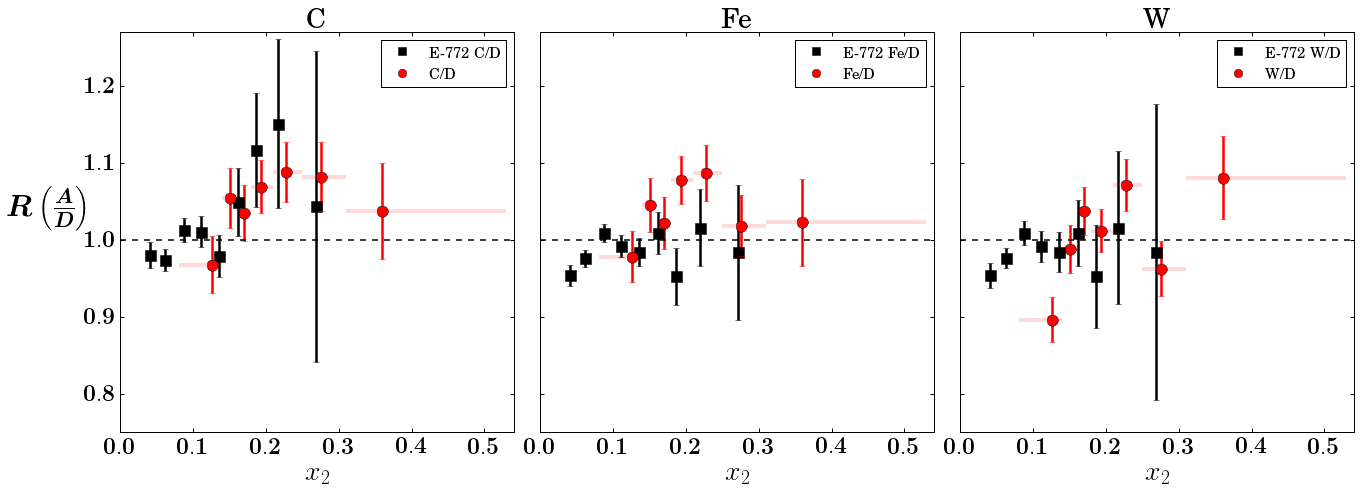

In [19]:
plot_three_emc(bin_centers, asymmetric_bars,
               [emc_df['C/D']], ['C/D'],
               [emc_df['Fe/D']], ['Fe/D'],
               [emc_df['W/D']], ['W/D'])

In [ ]:
plot_three_emc(bin_centers, asymmetric_bars,
               [emc_df57['C/D'], emc_df62['C/D'], emc_df67['C/D']],
               ['R57 C/D', 'R62 C/D', 'R67 C/D'],
               [emc_df57['Fe/D'], emc_df62['Fe/D'], emc_df67['Fe/D']],
               ['R57 Fe/D', 'R62 Fe/D', 'R67 Fe/D'],
               [emc_df57['W/D'], emc_df62['W/D'], emc_df67['W/D']],
               ['R57 W/D', 'R62 W/D', 'R67 W/D'])

In [ ]:
plot_three_emc(bin_centers, asymmetric_bars,
               [emc_df['C/D']], ['C/D'],
               [emc_df['Fe/D']], ['Fe/D'],
               [emc_df['W/D']], ['W/D'])

In [ ]:
plot_three_emc(bin_centers, asymmetric_bars,
               [emc_df['C/D']], ['C/D'],
               [emc_df['Fe/D'], emc_df['Fe/D(iso)']], ['Fe/D', 'Fe/D (iso)'],
               [emc_df['W/D'], emc_df['W/D(iso)']], ['W/D', 'W/D (iso)'])

In [ ]:
plot_three_emc(bin_centers, asymmetric_bars,
               [emc_df['C/D']], ['C/D'],
               [emc_df['Fe/C'], emc_df['Fe/C(iso)']], ['Fe/C', 'Fe/C (iso)'],
               [emc_df['W/C'], emc_df['W/C(iso)']], ['W/C', 'W/C (iso)'])

In [ ]:
plot_three_emc(bin_centers, asymmetric_bars,
               [emc_df['C/D']], ['C/D'],
               [emc_df['Fe/D(iso)'], emc_df['Fe/C(iso)']], ['Fe/D (iso)', 'Fe/C (iso)'],
               [emc_df['W/D(iso)'], emc_df['W/C(iso)']], ['W/D (iso)', 'W/C (iso)'])

In [ ]:
plot_three_emc(bin_centers, asymmetric_bars,
               [emc_df['C/D'], emc_df_q['C/D']], ['C/D', r'C/D ($I_p$)'],
               [emc_df['Fe/D'], emc_df_q['Fe/D']], ['Fe/D', r'Fe/D ($I_p$)'],
               [emc_df['W/D'], emc_df_q['W/D']], ['W/D', r'W/D ($I_p$)'])

In [ ]:
plot_three_emc(bin_centers, asymmetric_bars,
               [emc_df['C/D'], emc_df_q['C/D']], ['C/D', r'C/D ($I_p$)'],
               [emc_df['Fe/C'], emc_df_q['Fe/C']], ['Fe/C', r'Fe/C ($I_p$)'],
               [emc_df['W/C'], emc_df_q['W/C']], ['W/C', r'W/C ($I_p$)'])

In [ ]:
plot_three_emc(bin_centers, asymmetric_bars,
               [emc_df['C/D'], emc_df_q['C/D']], ['C/D', r'C/D ($I_p$)'],
               [emc_df['Fe/D(iso)'], emc_df_q['Fe/D(iso)']],
               ['Fe/D (iso)', r'Fe/D (iso, $I_p$)'],
               [emc_df['W/D(iso)'], emc_df_q['W/D(iso)']],
               ['W/D (iso)', r'W/D (iso, $I_p$)'])

In [ ]:
plot_three_emc(bin_centers, asymmetric_bars,
               [emc_df['C/D'], emc_df_q['C/D']], ['C/D', r'C/D ($I_p$)'],
               [emc_df['Fe/C(iso)'], emc_df_q['Fe/C(iso)']],
               ['Fe/C (iso)', r'Fe/C (iso, $I_p$)'],
               [emc_df['W/C(iso)'], emc_df_q['W/C(iso)']],
               ['W/C (iso)', r'W/C (iso, $I_p$)'])

In [ ]:
plot_three_emc(bin_centers, asymmetric_bars,
               [emc_df['D/H'], emc_df_q['D/H']], ['D/H', r'D/H ($I_p$)'],
               [emc_df['Fe/H'], emc_df_q['Fe/H']],
               ['Fe/H', r'Fe/H ($I_p$)'],
               [emc_df['W/H'], emc_df_q['W/H']],
               ['W/H', r'W/H ($I_p$)'],
               lims=(0, 0.54, 0.75, 1.5),
               savefile='H-ratio.png')

In [ ]:
target_df.index.values